## Regression

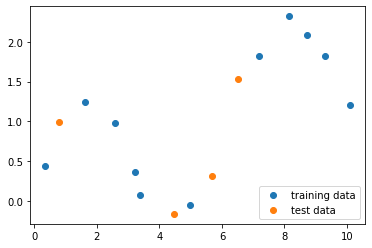

In [4]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [9]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    # your answer here
    
    poly = PolynomialFeatures(degree=1)
    X_poly1 = poly.fit_transform(X_train[None].T)
    input1 = poly.fit_transform(np.linspace(0,10,100).reshape(100, 1))
    linreg1 = LinearRegression().fit(X_poly1, y_train)
    array1 = linreg1.predict(input1)
    
    poly = PolynomialFeatures(degree=3)
    X_poly3 = poly.fit_transform(X_train[None].T)
    input3 = poly.fit_transform(np.linspace(0,10,100).reshape(100, 1))
    linreg3 = LinearRegression().fit(X_poly3, y_train)
    array3 = linreg3.predict(input3)
    
    poly = PolynomialFeatures(degree=6)
    X_poly6 = poly.fit_transform(X_train[None].T)
    input6 = poly.fit_transform(np.linspace(0,10,100).reshape(100, 1))
    linreg6 = LinearRegression().fit(X_poly6, y_train)
    array6 = linreg6.predict(input6)
    
    poly = PolynomialFeatures(degree=9)
    X_poly9 = poly.fit_transform(X_train[None].T)
    input9 = poly.fit_transform(np.linspace(0,10,100).reshape(100, 1))
    linreg9 = LinearRegression().fit(X_poly9, y_train)
    array9 = linreg9.predict(input9)
    
    return np.vstack((array1, array3, array6, array9)) # results
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

### Fitted model plot

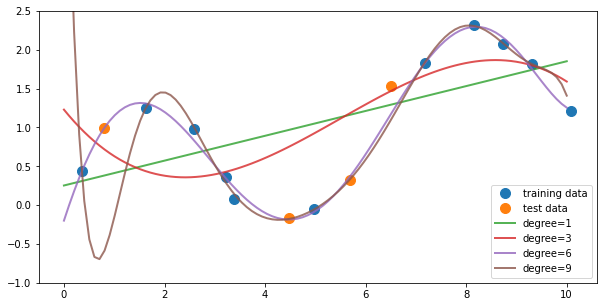

In [10]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above:
As number of degrees increase much overfitting increase as complexity increase as it tries to fit more training data points

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [11]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    # your code here
    r2_test, r2_train = [],[]
    for i in range (10):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train[None].T)
        X_test_poly = poly.fit_transform(X_test[None].T)
        linreg = LinearRegression().fit(X_train_poly, y_train)
        r2_train.append(linreg.score(X_train_poly,y_train))
        r2_test.append(linreg.score(X_test_poly,y_test))
    return (r2_train, r2_test) # answer here
answer_two()

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


([0.0,
  0.4292457781234663,
  0.45109980444082465,
  0.5871995368779845,
  0.919419447176932,
  0.9757864143068208,
  0.9901823324795068,
  0.993525092784037,
  0.9963754538775205,
  0.9980370625641755],
 [-0.4780864173714179,
  -0.45237104233936676,
  -0.06856984149915957,
  0.005331052945770853,
  0.7300494281868052,
  0.8770830091649059,
  0.9214093981363375,
  0.9202150410962014,
  0.6324794566910901,
  -0.6452456656078869])

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

<Figure size 432x288 with 0 Axes>

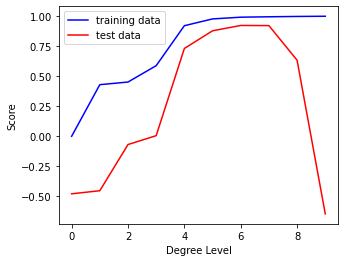

In [16]:
(r2_train, r2_test) = answer_two()
plt.figure()
plt.figure(figsize=(5,4))
plt.plot(range(0,10,1),r2_train,'b',label='training data')
plt.plot(range(0,10,1),r2_test,'r',label='test data')
plt.xlabel('Degree Level')
plt.ylabel('Score')
plt.legend()
# 0 degree for underfitting
# 9 degree for overfitting
# 6 degree for good generalization

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [32]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    
    # your code here
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train[None].T)
    X_test_poly = poly.fit_transform(X_test[None].T)
    linreg = LinearRegression().fit(X_train_poly, y_train)
    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit( X_train_poly, y_train)

    return (linreg.score(X_test_poly,y_test), linlasso.score(X_test_poly,y_test)) # results
answer_four()
# with Lasso 0.84 good score & close to fit since the best possible score is 1
# while with linear regression  underfitting for its negative score which gives a large error

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35564216958893824, tolerance: 0.00068949825403828
  model = cd_fast.enet_coordinate_descent(


(-4.311985920920155, 0.8406625614750374)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np
def mse(y_true, y_pred):
    ########### write code here #############
    subtracted_arr = np.subtract(y_true, y_pred)
    squared_arr = np.square(subtracted_arr)
    error = sum(squared_arr)/len(squared_arr)
    return error
Y_true = [1,2,3]
Y_pred = [4,5,6]
print('MSE_ManualFunction: ' + str(mse(Y_true,Y_pred)))
print('MSE_scikit-learn: ' + str(mean_squared_error(Y_true,Y_pred)))
# same results

MSE_ManualFunction: 9.0
MSE_scikit-learn: 9.0


### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations,flag ,l1_penality=0 , l2_penality=0) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations
        self.l1_penality = l1_penality
        self.l2_penality = l2_penality
        self.flag=flag
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
        if self.flag==1:
            dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        elif self.flag==2:
            # calculate gradients      
            dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) + ( 2 * self.l2_penality * self.W ) ) / self.m     
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        elif self.flag==3:
            dW = np.zeros( self.n )
            for j in range( self.n ) :
                if self.W[j] > 0 :
                    dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )+ self.l1_penality ) / self.m
                else :
                    dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )- self.l1_penality ) / self.m
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [52]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


In [53]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

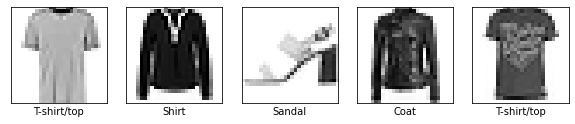

In [54]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [55]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [62]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    ########## write your code here ##############
    train_scores, test_scores,values=[],[],[]
    for clf in classifiers:
        values.append(cross_validate(clf, X, y, return_train_score= True, n_jobs=-1))
    for x in values:
        train_scores.append(x['train_score'] )
        test_scores.append(x['test_score'] )
    return (train_scores, test_scores)

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [63]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

Print train scores and test scores.

In [64]:
print(train_scores, test_scores)

[array([0.92017857, 0.91303571, 0.91232143, 0.91035714, 0.91107143]), array([0.8575    , 0.85892857, 0.86089286, 0.8575    , 0.85357143])] [array([0.80785714, 0.80142857, 0.80571429, 0.80928571, 0.80928571]), array([0.80714286, 0.79928571, 0.79      , 0.79357143, 0.81142857])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [66]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

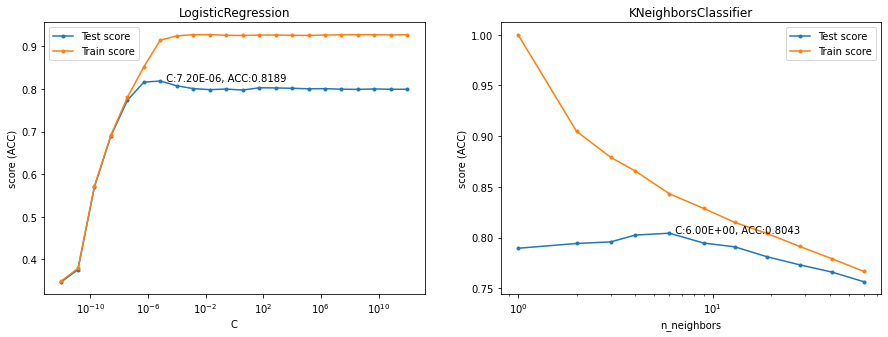

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

# When regularized LogisticRegression perform better than kNeighbours, LogisticRegression underfits in small C values and is fit at C=1e-7 then starts overfitting while kNeighbours overfits in small numbers of neighbors and reaches an optimum around numbers of neighbors  equal 4 then starts underfitting.

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [70]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [71]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [73]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred) ################

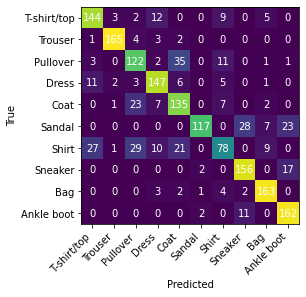

In [74]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
    
# some categories easier to predict like bags & troussers while others are confusing like shirts with T-shirts & pullovers and coat

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [76]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


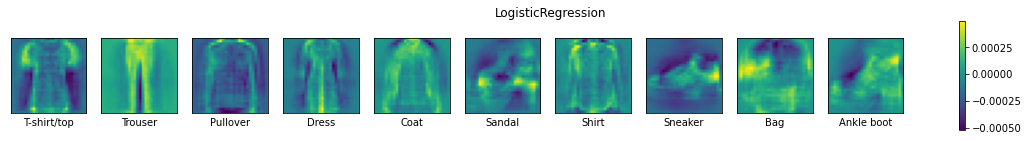

In [78]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train))

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:** multiple plots per model as 10 classes , bright pixels  and dark pixels in the images have a large effect on the final prediction, the model blow up pixel values at the edges of the shirt while suppress the background pixel values at the outlines of the shirt, inaddition some classes are less defined in some images causing confusion for other classes

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In the cell below replace the ####### with your trained models with different alphas.

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

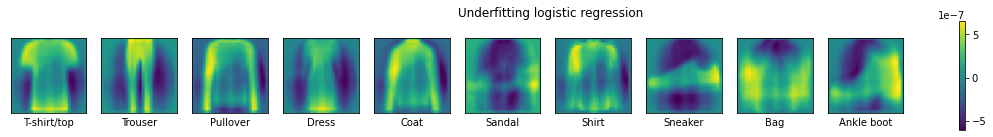

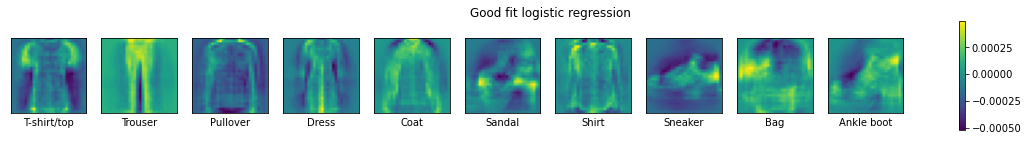

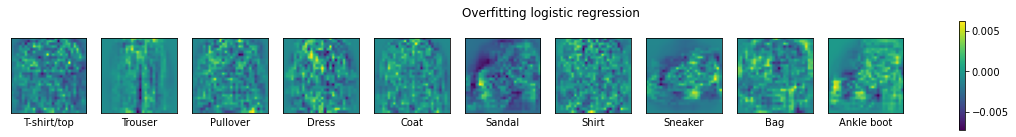

In [79]:
plot_coefficients(LogisticRegression(C=1e-11).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e+9).fit(X_train,y_train),"Overfitting logistic regression")

 **Answer:** Incase of overfitting it is affected by small variations & paaying attention to random pixels even background pixels while incase of underfitting it is affected by extreme weights and has very strong belief of the shapes